## Лабораторна робота 5. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [4]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

customer_set = get_data(data_path="Mall_Customers.csv")
customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})
print(customer_set.head(10))

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40
5           6  Female   22      17             76
6           7  Female   35      18              6
7           8  Female   23      18             94
8           9    Male   64      19              3
9          10  Female   30      19             72


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
customer_set.info(verbose=True)
print("------------------------")
print(str(customer_set.shape[0]) + " - строк")
print(str(customer_set.shape[1]) + " - столбцов")
print("------------------------")
for i in range(customer_set.shape[1]):    
    print(customer_set.columns[i] + " | max(" + str(customer_set.max()[i]) + ") | min(" + str(customer_set.min()[i]) + ")")
print("------------------------")
print(customer_set.describe())
print(customer_set.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
------------------------
200 - строк
5 - столбцов
------------------------
CustomerID | max(200) | min(1)
Gender | max(Male) | min(Female)
Age | max(70) | min(18)
Income | max(137) | min(15)
SpendingScore | max(99) | min(1)
------------------------
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [6]:
customer_set = customer_set.drop('CustomerID', axis =1)
print(customer_set.head(10))

   Gender  Age  Income  SpendingScore
0    Male   19      15             39
1    Male   21      15             81
2  Female   20      16              6
3  Female   23      16             77
4  Female   31      17             40
5  Female   22      17             76
6  Female   35      18              6
7  Female   23      18             94
8    Male   64      19              3
9  Female   30      19             72


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

Text(0.5, 1.0, 'SpendingScore')

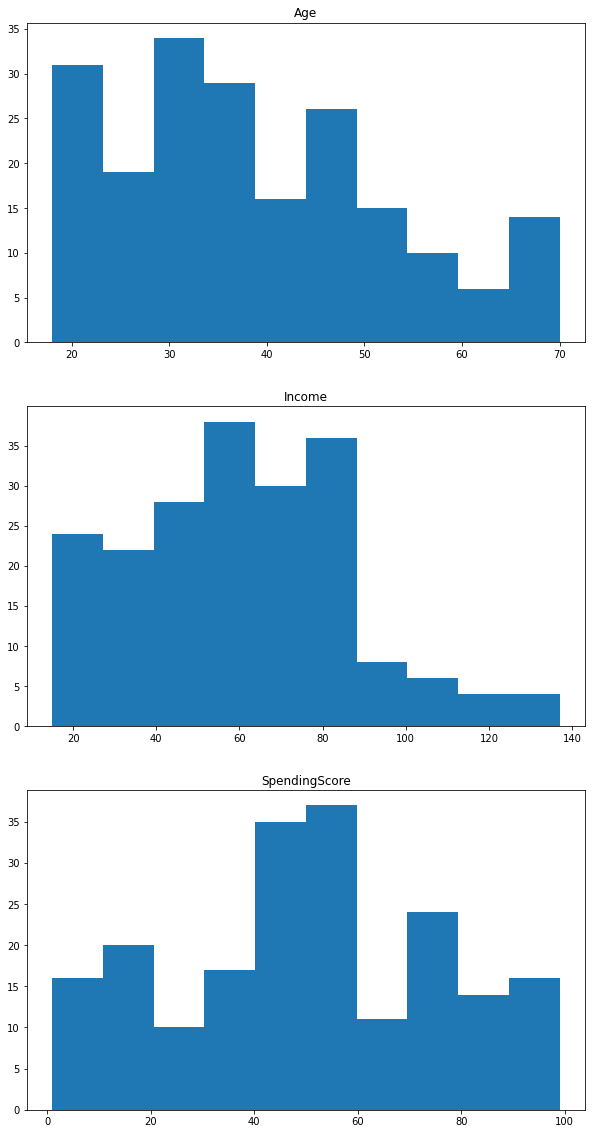

In [7]:
fig, ax = plt.subplots(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.hist(customer_set["Age"]) 
plt.title("Age")

plt.subplot(3, 1, 2)
plt.hist(customer_set["Income"]) 
plt.title("Income")

plt.subplot(3, 1, 3)
plt.hist(customer_set["SpendingScore"]) 
plt.title("SpendingScore")

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

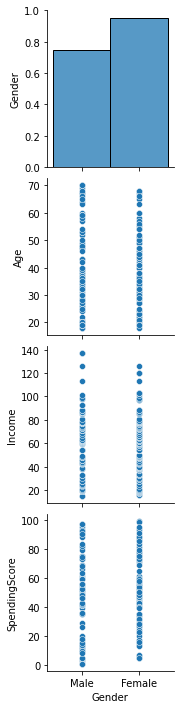

In [8]:
sns.pairplot(customer_set, y_vars=["Gender", "Age", "Income", "SpendingScore"], x_vars=["Gender"])

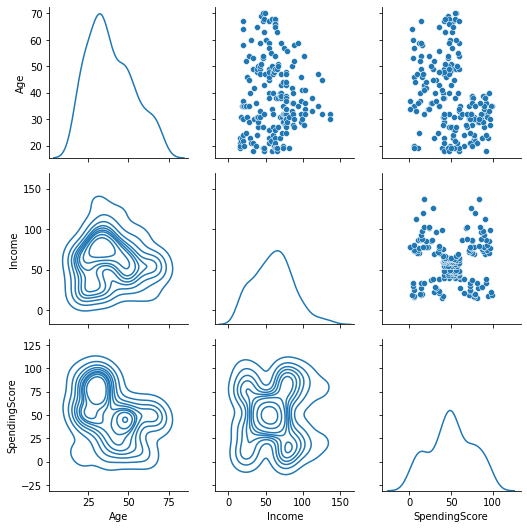

In [9]:
g = sns.PairGrid(customer_set)

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, lw=1)
g.map_diag(sns.kdeplot)

**Висновки з 1-4 завдання (детальні)**

Висновок 1-4: 
0. Я завантажив вибору, змінивши назви двох елементів.
1. Після виводу основної інформації про датасет зразуміло: 
- що він має 5 атрибутів і 200 прикладів(строк); 
- вибірка не має пропусків по всім атрибутам;
- всі змінні з датасету мають тип int, окрім Gender;
- була знайдена вся інша статистична інформація.
2. Я видалив змінну CustomerID, тому що вона є індексом котрий не несе в собі ніякої інформативності для аналізу.  
3. Я побудував гістограми розподілу по змінним Age , Income та SpendingScore, з якої зрозуміло що:
- більшість відвідувачів торгового центру середнього віку, зі збільшенням віку кількість людей зменьшується;
- вибірка має майже однакову клькість людей з доходами від 20 до 80, а зі більшення цього числа таких відвідувачив стає меньше. - найбільша кількість покупців проходячи в торговий центр має середні витрати. 
4. 

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Осіб чоловічого полу = 44.0%
Осіб жіночого полу = 56.0%


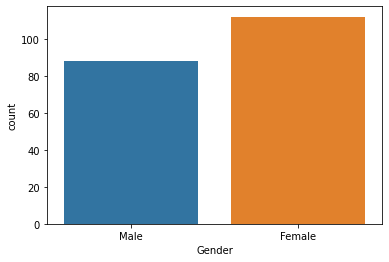

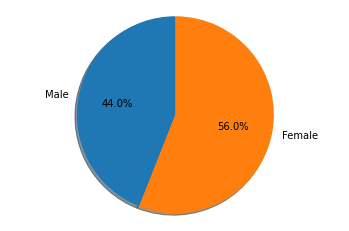

In [10]:
x = customer_set[customer_set["Gender"] == "Male"].shape[0] * 100 / customer_set.shape[0]

print("Осіб чоловічого полу = " + str(x) + "%")
print("Осіб жіночого полу = " + str(100 - x) + "%")
sns.countplot(data=customer_set, x="Gender")

fig1, ax1 = plt.subplots()
ax1.pie([x, 100 - x], labels=["Male", "Female"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

<AxesSubplot:xlabel='Age', ylabel='Gender'>

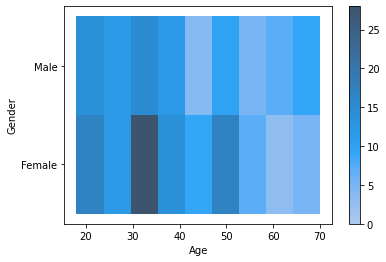

In [11]:
sns.histplot(x="Age", y="Gender", data=customer_set, cbar=True, multiple='dodge')

<AxesSubplot:xlabel='Age', ylabel='Gender'>

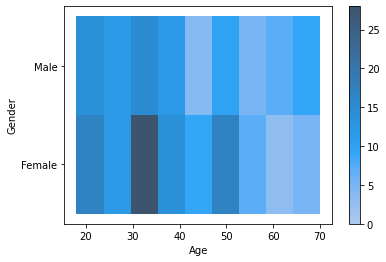

In [12]:
sns.histplot(x="Age", y="Gender", data=customer_set, cbar=True, multiple='layer')

<AxesSubplot:xlabel='Income', ylabel='Gender'>

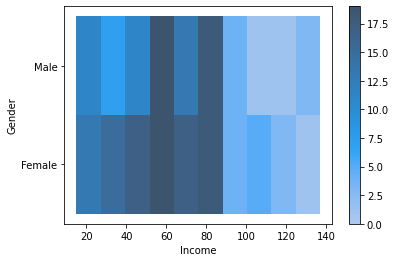

In [13]:
sns.histplot(x="Income", y="Gender", data=customer_set, cbar=True, multiple='dodge')

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



<AxesSubplot:xlabel='SpendingScore', ylabel='Gender'>

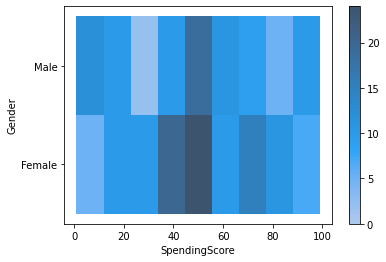

In [14]:
sns.histplot(x="SpendingScore", y="Gender", data=customer_set, cbar=True, multiple='layer')

<AxesSubplot:xlabel='SpendingScore', ylabel='Gender'>

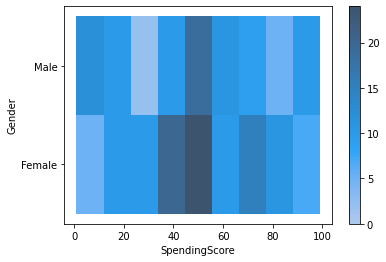

In [15]:
sns.histplot(x="SpendingScore", y="Gender", data=customer_set, cbar=True, multiple='dodge')

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<AxesSubplot:xlabel='SpendingScore', ylabel='Gender'>

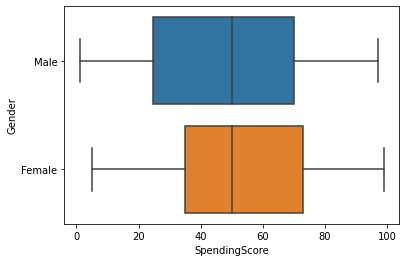

In [16]:
sns.boxplot(data=customer_set, x="SpendingScore", y="Gender")

**Висновки з завдання 5 - 8(детальні)**

1. Яке співвідношення груп чоловіків та жінок? Співвідношення чоловіків до жінок в торгівельном центрі 44% до 56%.
2. Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? - Чоловки в основному витрачають тільки три види сум малі(0-20), середні (35-60) та дуже високі(90-100), що може поділити їх на групи. У Жінок же ситуація стабільно збільшується до середніх сум і зменьшується до максимальних з піком в середині(50).   
3. Чи є різниця між витратами у чоловіків та жінок? - Чоловіки частіше витрачають меньші суми ніж жінки, а жінки навпаки.
4. По гістаграмамі пункт 6 можна зробити висновок що жінки котрі відвідували цей торговий центр мали більший Income. Відповідно років ситуація однакова. 

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

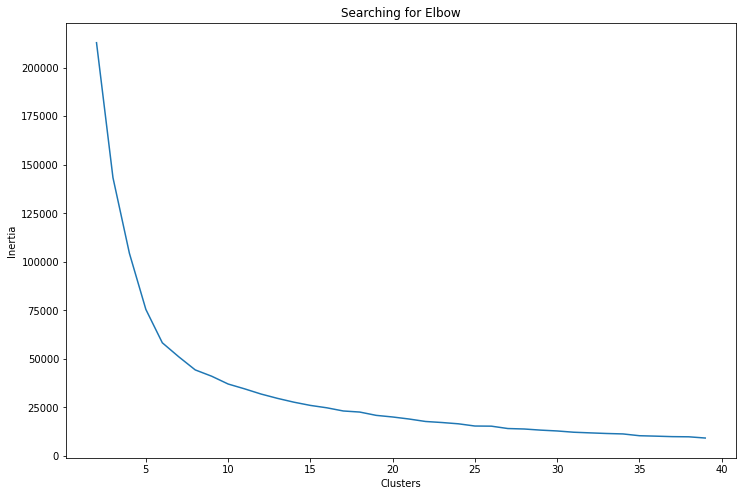

In [17]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(X)
    clusters.append(kmeans.inertia_)

    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 40)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1. Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2. Я видалив змінну Gender тому що K-means Method не працює з категоріальними змінними.  
3. Провівши кластеризацію K-means методом на К від 2 до 40 я отримав графік інерції на різних кількостях кластерів. Дивлячись на данних шгафік зрозкміло що 10 і більше кластерів дають не набагато меньшу суму квадратів відстаней (інерцію) тому для данной вибірки 10 кластерів досить. 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

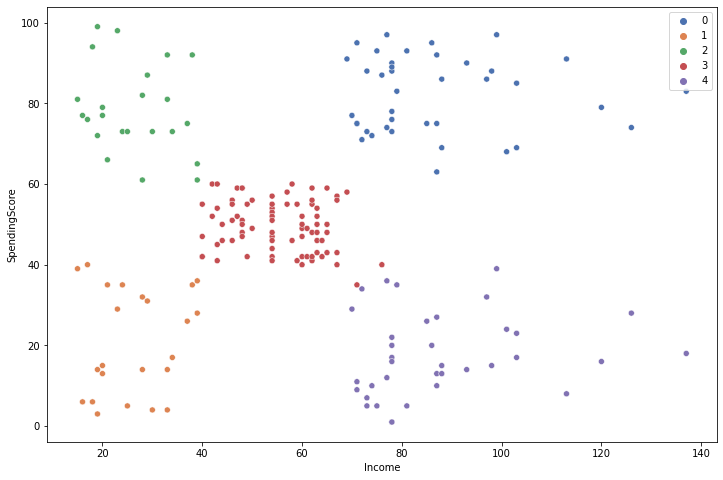

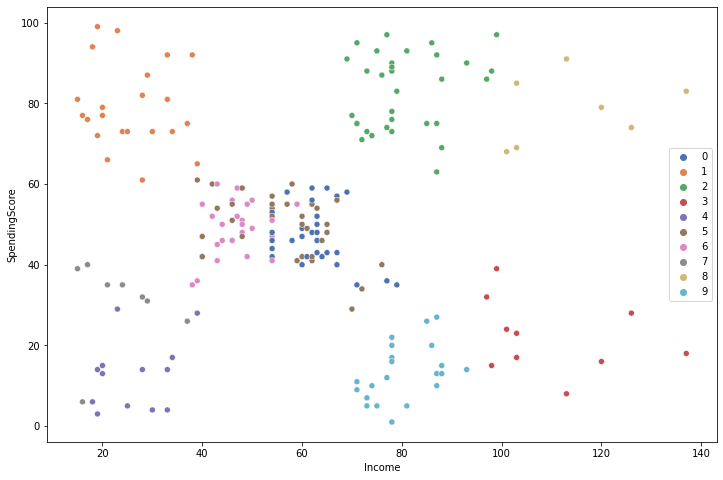

In [18]:
for i in range(5, 11, 5):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(X)
    clusters.append(kmeans.inertia_)
    label = kmeans.labels_

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=X, x="Income", y="SpendingScore", hue=label, ax=ax, palette="deep")

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [19]:
for i in range(5, 9, 3):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(X)
    clusters.append(kmeans.inertia_)
    label = kmeans.labels_

    fig = px.scatter_3d(X, x="Income", y="SpendingScore", z="Age", color=label)
    fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2. Дивлячись на двовимірну візуалізацію кластеризації котра використовує змінні Income та SpendingScore зрозуміло що ідеально підходить 5 кластерів оскільки на графіку чітко простежуються 5 груп. При збільшенні кількости кластерів до 10 ситуація погіршується. 
3. Дивлячись на тривимірну візуалізацію кластеризації котра використовує змінні Income, SpendingScore та Age дивлячись на 3-вимірний графік 5 класів і 8 класів мало чим відрізняються, проте 8 класів є трохи точнішими.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [20]:
for i in range(5, 8, 2):
    agglom = AgglomerativeClustering(n_clusters=i, linkage = 'complete').fit(X)
    label = agglom.labels_

    fig = px.scatter_3d(X, x="Income", y="SpendingScore", z="Age", color=label)
    fig.show()

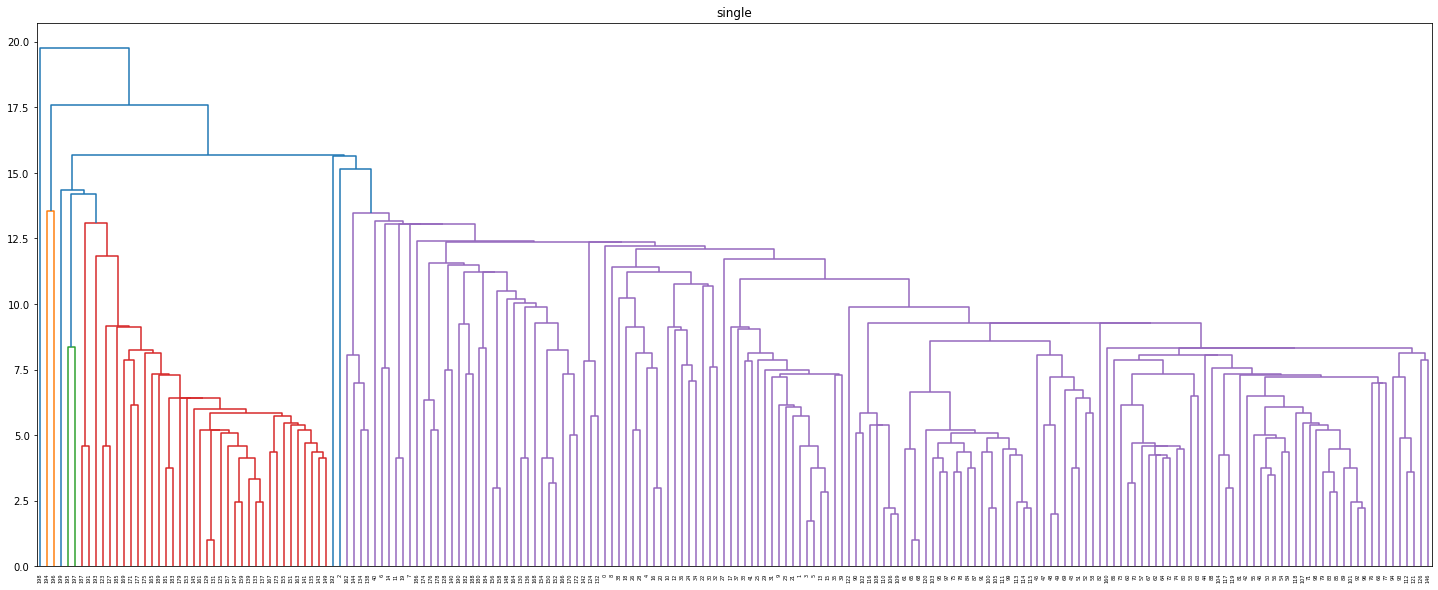

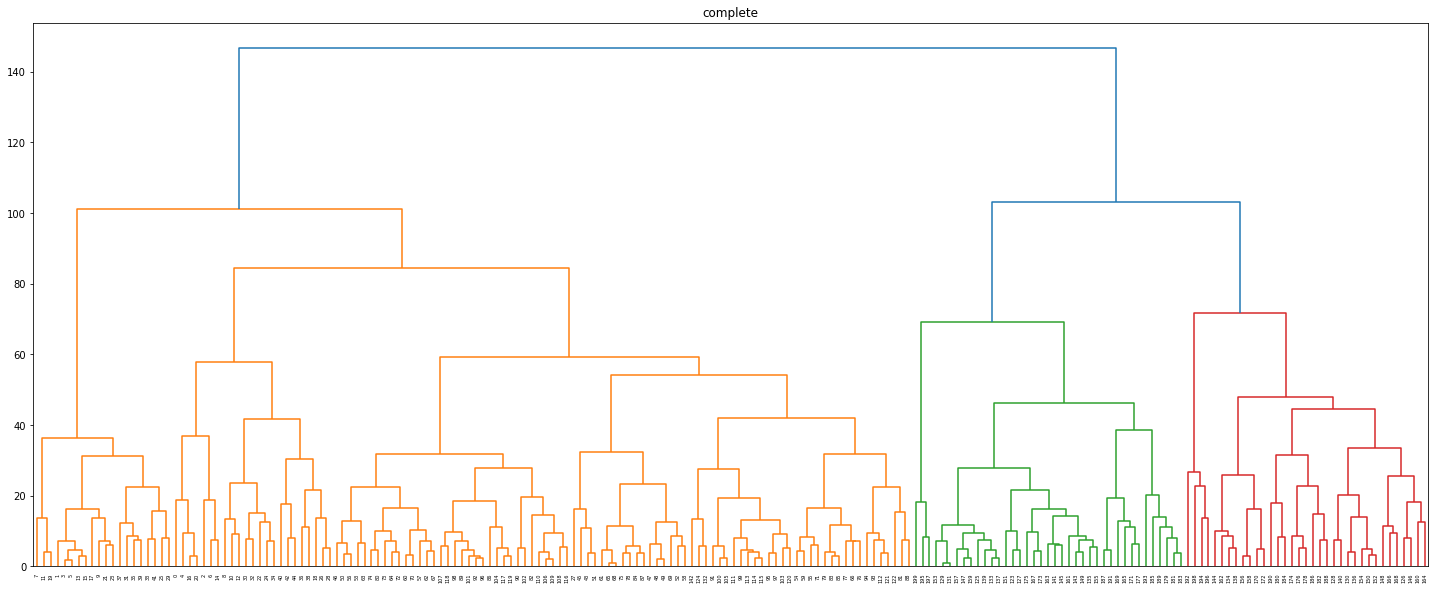

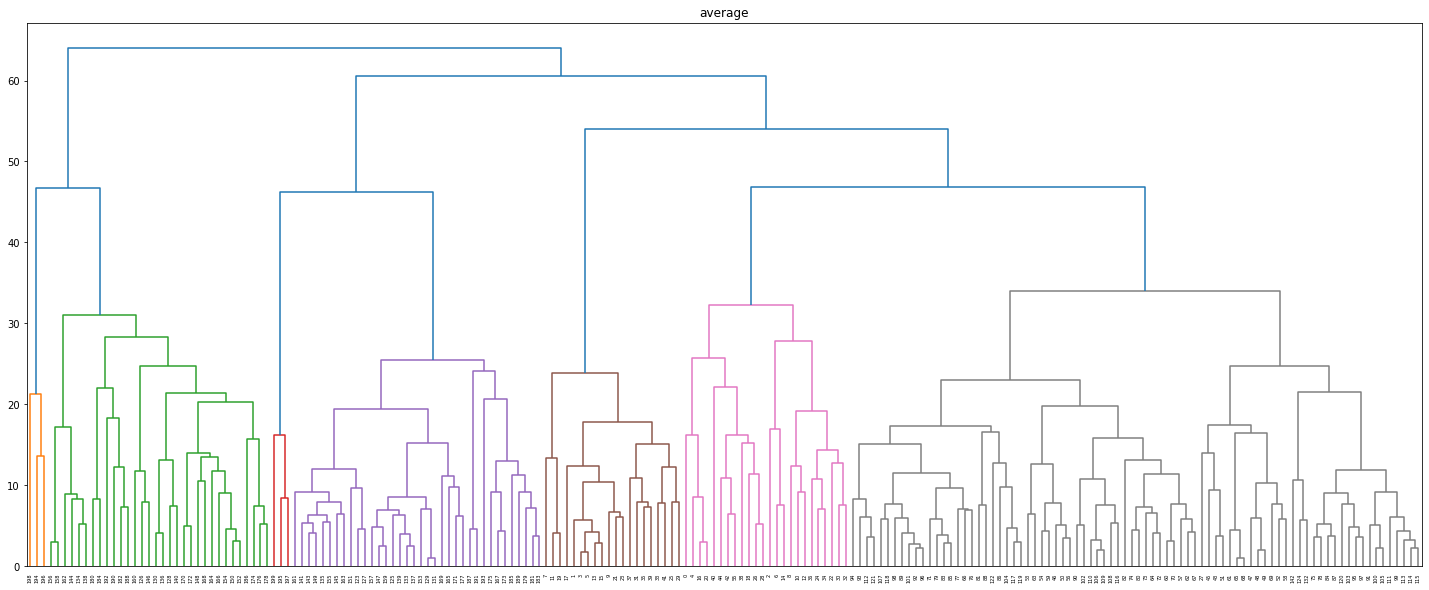

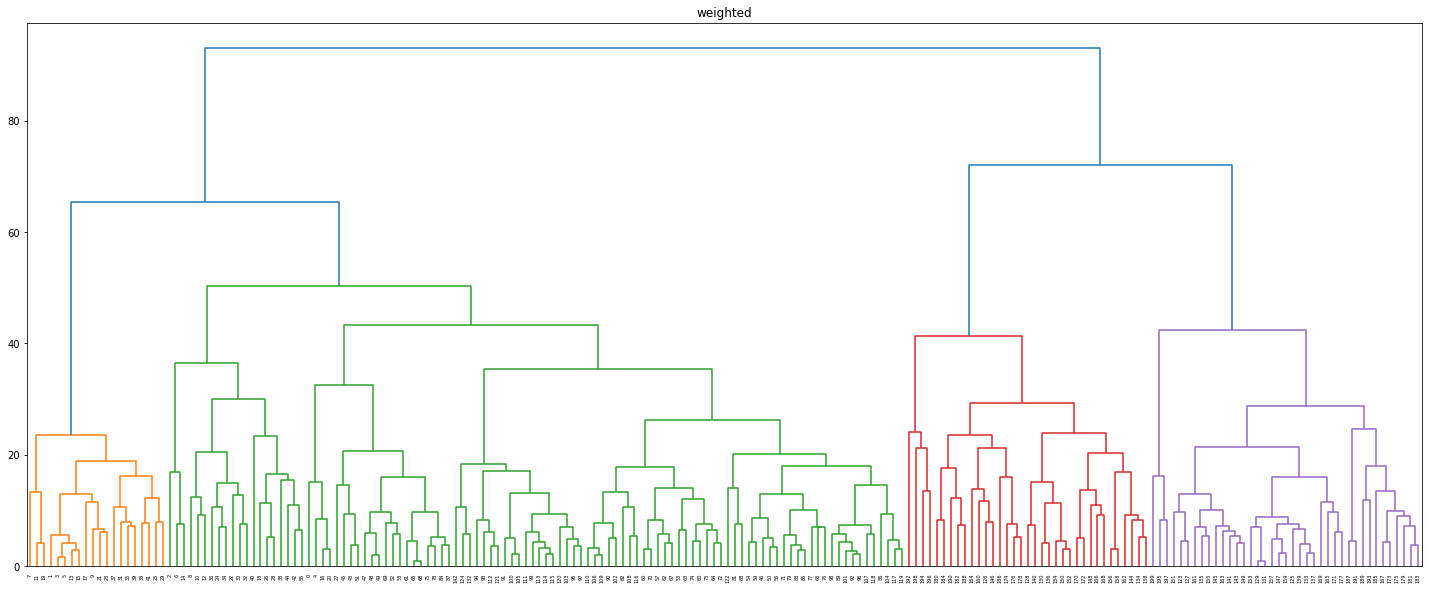

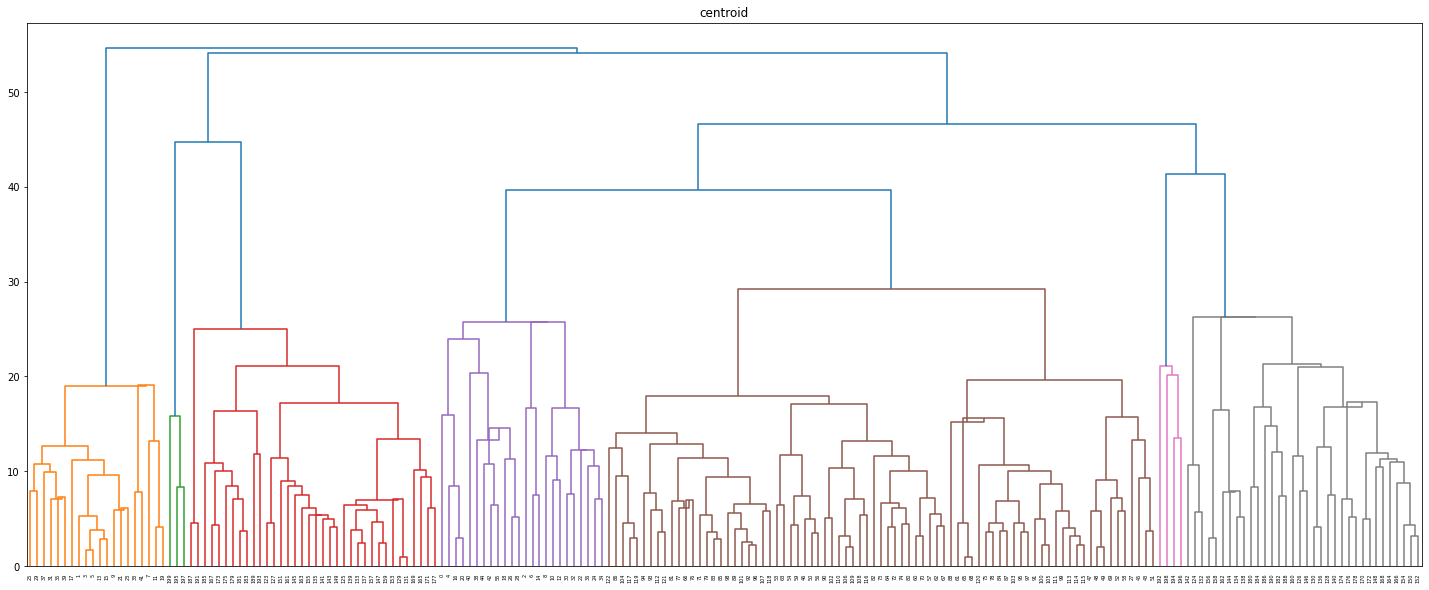

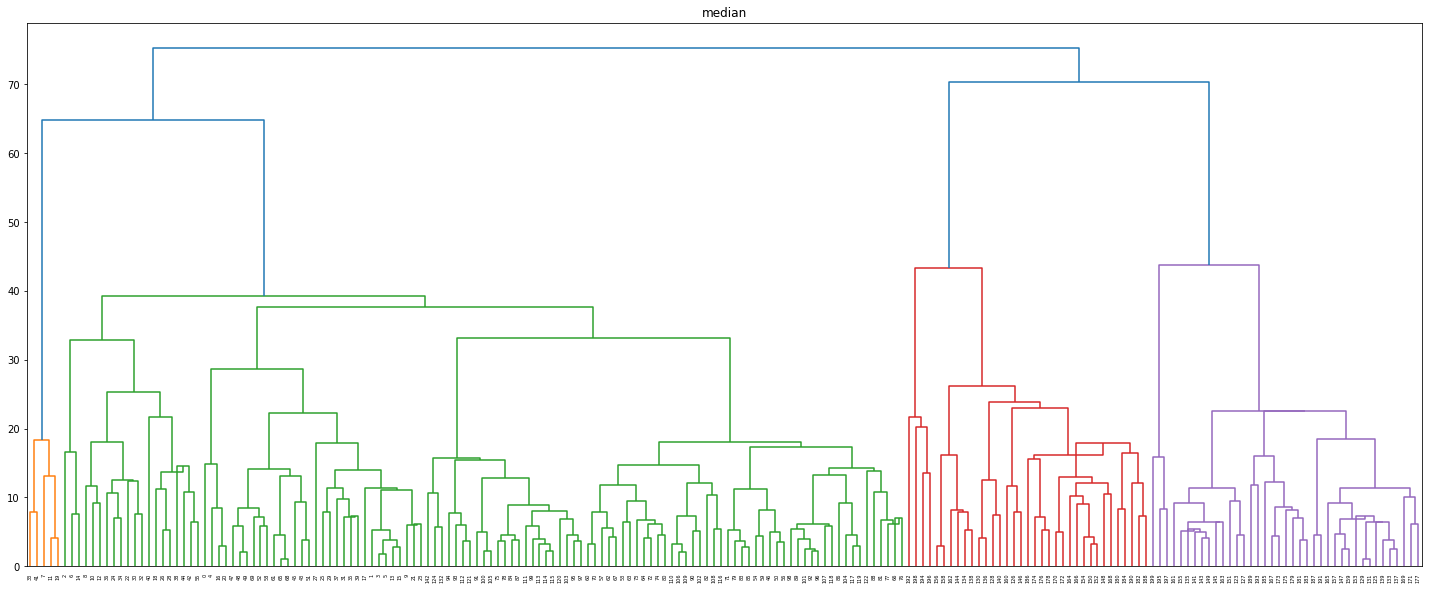

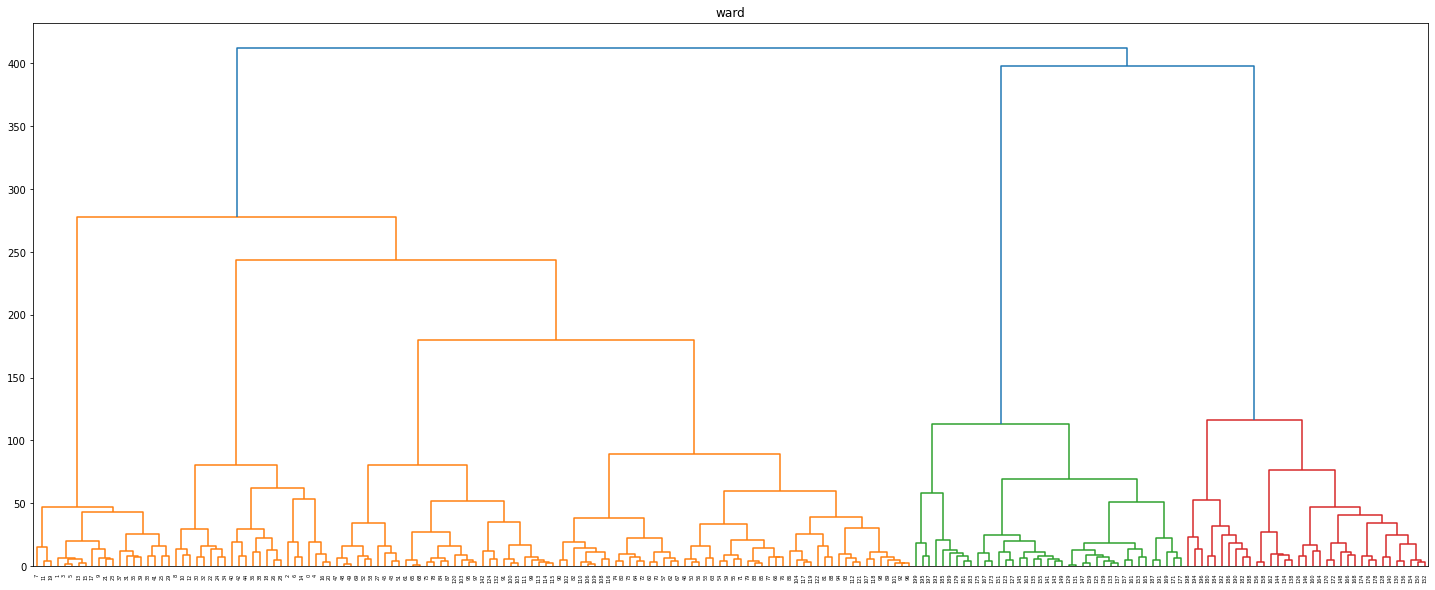

In [21]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
for i in methods:
    Z = hierarchy.linkage(X, i)
    fig = plt.figure(figsize=(25, 10))
    plt.title(i)
    dn = hierarchy.dendrogram(Z)
    


**Висновки з завдання 12 (детальні)**

1. Я кластеризував датасет за допомогою агломеративної ієрархічнуої кластеризації.
2. Під час реалізації кластеризації я налаштовував парарметри кластеризації n_clusters - кількість кластерів та linkage - метод котрим програма вираховує відстань між наборами спостережень. 
3. Дивдячись на різні кількості кластерів на графіків я прийшов до висновку що 5 кластерів є найоптимальнішим рішенням. У виборі linkage я спробував всі налаштування. На 5 кластерном рішенні добре працюють всі варіанти окрім single, котрий себе взагалі погано показав. А на 6 і більше кластерних варіантах працюють добре тільки complete та average.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

In [22]:
n_cluster = 5
print("Метод K-means")
kmeans = KMeans(n_clusters=n_cluster, max_iter=1000).fit(X)
clusters.append(kmeans.inertia_)
label = kmeans.labels_
fig = px.scatter_3d(X, x="Income", y="SpendingScore", z="Age", color=label)
fig.show()

print("Метод Agglomerative clustering")
agglom = AgglomerativeClustering(n_clusters=n_cluster, linkage = 'complete').fit(X)
label = agglom.labels_
fig = px.scatter_3d(X, x="Income", y="SpendingScore", z="Age", color=label)
fig.show()

Метод K-means


Метод Agglomerative clustering


**Висновки з завдання 13 (детальні)**

1. В фінальних візуалізаціях я використав однакову кількість кластерів = 5.
2. Дивлячись на графіки візуалізацій побудованої на основі трьох змінних (Income, SpendingScore, Age) кластеризації можливо припустити що данні діляться на 5 груп.
